# COVID-19 - Pandemic!

## About COVID-19

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.

Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

The best way to prevent and slow down transmission is be well informed about the COVID-19 virus, the disease it causes and how it spreads. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face.

The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so it’s important that you also practice respiratory etiquette (for example, by coughing into a flexed elbow).

At this time, there are no specific vaccines or treatments for COVID-19. However, there are many ongoing clinical trials evaluating potential treatments. WHO will continue to provide updated information as soon as clinical findings become available.

**Source:**

WHO (2020): https://www.who.int/health-topics/coronavirus#tab=tab_1

## Problem Statement:

The COVID-19 startd in Wuhan, China and has spread across 182 countries of the world. New cases are arising every day with records of deaths.

As the coronavirus outbreak continues to spread in the country, the question that we as citizens of the world are trying to answer is :

How soon can we be able to tackle this pandemic and go back to our normal social and economic life?

**The Aim of this here:**

This is an attempt to develop a strong model that can predicts how the virus could spread across different countries and regions. The model prideicts the spread of the virus in the next 7 days.

**Steps taken:**
* Analyses of the present situation around the world

* Is there an identifiable trend?

* Exploring the situation in Finland and Nigeria and the top 11 most affected countries

* Forecasting the worldwide COVID-19 cases using Prophet

# Analysing WHO report on COVID-19-geographic-disbtribution-worldwide

**Import required libraries and settings**

In [27]:
# importing the required libraries
import pandas as pd
import pandas.util.testing as tm

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
#import folium 
#from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

# Exploring WHO Worldwide Confirmed vs Deaths Cases

Source: WHO https://who.sprinklr.com/



### Load Data from WHO on COVID-19

In [70]:
# Load data
# 6th April 2020
#df_WHO_Data = pd.read_excel("WHO-COVID-19-global-data_20200406.xlsx")
# 7th April 2020
#df_WHO_Data = pd.read_excel("WHO-COVID-19-global-data_20200407.xlsx")
# 8th April 2020
#df_WHO_Data = pd.read_excel("WHO-COVID-19-global-data_20200413_.xlsx")
# 14th April 2020
#df_WHO_Data = pd.read_csv("WHO-COVID-19-global-data_20200507.csv")
# 06th Jan 2022 
df_WHO_Data = pd.read_excel('WHO-COVID-19-global-data_20220106.xlsx')
df_WHO_Data.rename(columns={'Date_reported':'Date_reported', 'Unnamed: 8':'Comments'}, inplace=True)
print(df_WHO_Data.shape)
df_WHO_Data.tail()

(173958, 8)


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
173953,2022-01-01,ZW,Zimbabwe,AFRO,0,211728,0,4997
173954,2022-01-02,ZW,Zimbabwe,AFRO,2486,214214,20,5017
173955,2022-01-03,ZW,Zimbabwe,AFRO,664,214878,15,5032
173956,2022-01-04,ZW,Zimbabwe,AFRO,1209,216087,15,5047
173957,2022-01-05,ZW,Zimbabwe,AFRO,1591,217678,31,5078


In [71]:
# Check for Empty Values
df_WHO_Data.isnull().sum()

Date_reported          0
Country_code         734
Country                0
WHO_region             0
New_cases              0
Cumulative_cases       0
New_deaths             0
Cumulative_deaths      0
dtype: int64

In [72]:
# Check for the datatypes of column especially the Date column: should be datetime
df_WHO_Data.dtypes

Date_reported        datetime64[ns]
Country_code                 object
Country                      object
WHO_region                   object
New_cases                     int64
Cumulative_cases              int64
New_deaths                    int64
Cumulative_deaths             int64
dtype: object

In [73]:
# Change Date to datetime datatype
df_WHO_Data['Date_reported'] = pd.to_datetime(df_WHO_Data['Date_reported'])
df_WHO_Data.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
173953,2022-01-01,ZW,Zimbabwe,AFRO,0,211728,0,4997
173954,2022-01-02,ZW,Zimbabwe,AFRO,2486,214214,20,5017
173955,2022-01-03,ZW,Zimbabwe,AFRO,664,214878,15,5032
173956,2022-01-04,ZW,Zimbabwe,AFRO,1209,216087,15,5047
173957,2022-01-05,ZW,Zimbabwe,AFRO,1591,217678,31,5078


In [74]:
# Check dataype again
df_WHO_Data.dtypes

Date_reported        datetime64[ns]
Country_code                 object
Country                      object
WHO_region                   object
New_cases                     int64
Cumulative_cases              int64
New_deaths                    int64
Cumulative_deaths             int64
dtype: object

**Rename Columns**

In [75]:
## Data after Renaming the columns ...
#df_WHO_Data.columns=["Date", "Country Code", "Country", "Region", "Daily Deaths", "Cumulative Deaths","New Cases", "Cumulative Confirmed"]
print(df_WHO_Data.shape)
df_WHO_Data.tail()

(173958, 8)


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
173953,2022-01-01,ZW,Zimbabwe,AFRO,0,211728,0,4997
173954,2022-01-02,ZW,Zimbabwe,AFRO,2486,214214,20,5017
173955,2022-01-03,ZW,Zimbabwe,AFRO,664,214878,15,5032
173956,2022-01-04,ZW,Zimbabwe,AFRO,1209,216087,15,5047
173957,2022-01-05,ZW,Zimbabwe,AFRO,1591,217678,31,5078


### Compute

**Total number of confirmed COVID 2019 cases Worldwide**

**and**

**Total number of deaths COVID 2019 cases Worldwide**

**Confirmed cases**

In [79]:
#Learn how to play around with the dataframe and create a new attribute of 'Total Case'
wDate = df_WHO_Data['Date_reported']
#df.drop(['S. No.'],axis=1,inplace=True)
df_WHO_Data['Total Number of Cases'] = df_WHO_Data['New_cases']
who_total_cases = df_WHO_Data['Total Number of Cases'].sum()
print('Total number of confirmed COVID 2019 cases Worldwide till date', max(wDate),'is:', who_total_cases)

Total number of confirmed COVID 2019 cases Worldwide till date 2022-01-05 00:00:00 is: 293750692


**Deaths cases**

In [80]:
#Learn how to play around with the dataframe and create a new attribute of 'Total Case'
wDate = df_WHO_Data['Date_reported']
df_WHO_Data['Total Number of Deaths'] = df_WHO_Data['New_deaths']
who_total_deaths = df_WHO_Data['Total Number of Deaths'].sum()
print('Total number of deaths COVID 2019 cases Worldwide till date', max(wDate),'is:', who_total_deaths)

Total number of deaths COVID 2019 cases Worldwide till date 2022-01-05 00:00:00 is: 5454131


## Visualizing: WHO Worldwide NCOVID-19 cases

###Table of Active and Deaths Worldwide

In [81]:
#Learn how to use Seaborn for visualization
print('Total number of Active and Deaths COVID 2019 cases worldwide', max(wDate),'is:', who_total_cases, 'and', who_total_deaths, '\n')
Tot_ActiveDeathCases = df_WHO_Data.groupby('Country')['Total Number of Cases', 'Total Number of Deaths'].sum().sort_values(by=['Total Number of Cases'],ascending=False)
Tot_ActiveDeathCases.style.background_gradient(cmap='Reds')

Total number of Active and Deaths COVID 2019 cases worldwide 2022-01-05 00:00:00 is: 293750692 and 5454131 



,Total Number of Cases,Total Number of Deaths
Country,,
United States of America,55972114,821408
India,35018358,482551
Brazil,22305078,619209
The United Kingdom,13641524,148941
Russian Federation,10585984,313015
France,10316283,121960
Turkey,9651503,82932
Germany,7297320,112925
Spain,6785287,89689


### Worldwide Graphical View

In [82]:
# set confirmed and deaths values for display
confirmed = df_WHO_Data.groupby('Date_reported').sum()['Total Number of Cases'].reset_index()
deaths = df_WHO_Data.groupby('Date_reported').sum()['Total Number of Deaths'].reset_index()
who_Total_ActiveCases = df_WHO_Data['Total Number of Cases'].sum()
who_Total_Deaths = df_WHO_Data['Total Number of Deaths'].sum()

fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date_reported'], y=confirmed['Total Number of Cases'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date_reported'], y=deaths['Total Number of Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
#fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Daily Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()
print('Total Active Cases Worldwide:', who_Total_ActiveCases)
print('Total Deaths Cases Worldwide:', who_Total_Deaths)

Total Active Cases Worldwide: 293750692
Total Deaths Cases Worldwide: 5454131


### query() function: To View and analise specific country

*   List item
*   List item



In [85]:
# Check for specific country's data
qucountry = df_WHO_Data.query('Country=="Finland"').groupby("Date_reported")[['Total Number of Cases', 'Total Number of Deaths']].sum().reset_index()
qucountry.tail()

,Date_reported,Total Number of Cases,Total Number of Deaths
729,2022-01-01,5910,2
730,2022-01-02,3741,1
731,2022-01-03,3709,2
732,2022-01-04,4977,1
733,2022-01-05,2869,0


#### View top 11 countries affected and Finland / Nigeria

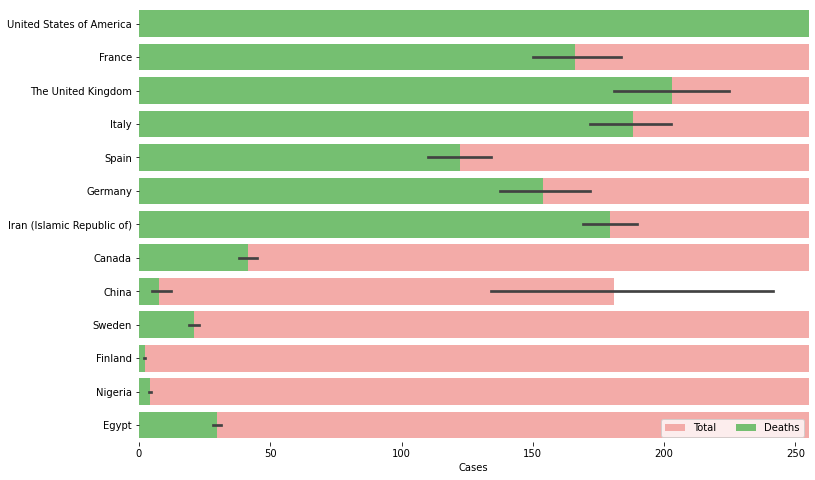

In [86]:
#Learn how to use Seaborn for visualization
f, ax = plt.subplots(figsize=(12, 8))
dat = Tot_ActiveDeathCases
#print(dat)
df_whofull = pd.merge(dat,df_WHO_Data,on='Country')
#print(df_whofull)
#Pick top 11 countries affected and Finland / Nigeria
data = df_whofull[(df_whofull.Country == 'United States of America') | (df_whofull.Country == 'Spain') 
| (df_whofull.Country == 'Sweden') | (df_whofull.Country == 'Italy') | (df_whofull.Country == 'Germany') 
| (df_whofull.Country == 'China') | (df_whofull.Country == 'France') | (df_whofull.Country == 'Iran (Islamic Republic of)') 
| (df_whofull.Country == 'The United Kingdom') | (df_whofull.Country == 'Canada') | (df_whofull.Country == 'Finland') 
| (df_whofull.Country == 'Egypt') | (df_whofull.Country == 'Nigeria')]
[['Country', 'Total Number of Cases_y', 'Total Number of Deaths_y']]
data.sort_values('Total Number of Cases_y',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total Number of Cases_y", y="Country", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Total Number of Deaths_y", y="Country", data=data, label="Deaths", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 255), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

# Visualizing: Finland NCOVID-19 cases

**Table Data View**

In [88]:
# Check for Finland's data
print('COVID-19 Status in Finland as at', max(wDate), '\n')
Finland = df_WHO_Data.query('Country=="Finland"').groupby("Date_reported")[['Total Number of Cases', 'Total Number of Deaths']].sum().reset_index().sort_values(by='Date_reported',ascending=False)
Finland.style.background_gradient(cmap='Blues')

COVID-19 Status in Finland as at 2022-01-05 00:00:00 



,Date_reported,Total Number of Cases,Total Number of Deaths
733,2022-01-05 00:00:00,2869,0
732,2022-01-04 00:00:00,4977,1
731,2022-01-03 00:00:00,3709,2
730,2022-01-02 00:00:00,3741,1
729,2022-01-01 00:00:00,5910,2
728,2021-12-31 00:00:00,6810,0
727,2021-12-30 00:00:00,6914,2
726,2021-12-29 00:00:00,6425,3
725,2021-12-28 00:00:00,6472,5
724,2021-12-27 00:00:00,3298,4


**Interactive graph view**

In [91]:
# set confirmed and deaths values for display
confirmed = df_WHO_Data.query('Country=="Finland"').groupby('Date_reported').sum()['Total Number of Cases'].reset_index()
deaths = df_WHO_Data.query('Country=="Finland"').groupby('Date_reported').sum()['Total Number of Deaths'].reset_index()
who_finland_Total_ActiveCases = df_WHO_Data.query('Country=="Finland"')['Total Number of Cases'].sum()
who_finland_Total_Deaths = df_WHO_Data.query('Country=="Finland"')['Total Number of Deaths'].sum()

fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date_reported'], y=confirmed['Total Number of Cases'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date_reported'], y=deaths['Total Number of Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
#fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Finland NCOVID-19 Daily Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()
print('Total Active Cases Finland:', who_finland_Total_ActiveCases)
print('Total Deaths Cases Finland:', who_finland_Total_Deaths)

Total Active Cases Finland: 289622
Total Deaths Cases Finland: 1624


# Forecasting Total Number of Confirmed Cases and Death Cases Worldwide Using Prophet



## Prophet
Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.


**Why Prophet?**

Accurate and fast: Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting. Facebook finds it to perform better than any other approach in the majority of cases. It fit models in Stan so that you get forecasts in just a few seconds.

**Fully automatic:**
Get a reasonable forecast on messy data with no manual effort. Prophet is robust to outliers, missing data, and dramatic changes in your time series.

**Tunable forecasts:**
The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human-interpretable parameters to improve your forecast by adding your domain knowledge

**Available in R or Python:**
Facebook has implemented the Prophet procedure in R and Python. Both of them share the same underlying Stan code for fitting. You can use whatever language you’re comfortable with to get forecasts.

** **

**References**

https://facebook.github.io/prophet/

https://facebook.github.io/prophet/docs/

https://github.com/facebook/prophet

https://facebook.github.io/prophet/docs/quick_start.html


In [92]:
# Import Prophet
from fbprophet import Prophet

In [93]:
# Prepare and Indicate Number of Cases and Number of Deaths
confirmed = df_WHO_Data.groupby('Date_reported').sum()['Total Number of Cases'].reset_index()
#confirmed = df_WHO_Data.query('Country=="Finland"').groupby('Date').sum()['Total Number of Cases'].reset_index()
deaths = df_WHO_Data.groupby('Date_reported').sum()['Total Number of Deaths'].reset_index()
who_Total_ActiveCases = df_WHO_Data['Total Number of Cases'].sum()
who_Total_Deaths = df_WHO_Data['Total Number of Deaths'].sum()

In [ ]:
#Finland = df_WHO_Data.query('Country=="Finland"').groupby("Date")['Total Number of Cases'].sum().reset_index()
#Finland.style.background_gradient(cmap='Blues')

## Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (Base model)




The input to Prophet is always a dataframe with two columns: **ds** and **y**. The ds (**datestamp**) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [94]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

print('Most rescent confirmed cases')
confirmed.tail()

Most rescent confirmed cases


,ds,y
729,2022-01-01,1896763
730,2022-01-02,1658610
731,2022-01-03,1037855
732,2022-01-04,1255142
733,2022-01-05,2294039


**Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval** by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [95]:
m = Prophet(interval_width=0.95) #, yearly_seasonality='auto', daily_seasonality='auto'
m.fit(confirmed)
future = m.make_future_dataframe(periods=7, include_history=True)
#future.tail(7)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


The **predict** method will assign each row in future a predicted value which it names *yhat*. If you pass in historical dates, it will provide an in-sample fit. The **forecast object** here is a new dataframe that includes a column **yhat** with the forecast, as well as columns for components and uncertainty intervals.

In [96]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
new_cases = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(8)
# new_cases
# Rename Columns
print('Forecasting Worldwide New cases as at:', max(wDate), '\n')
new_cases.columns=["Date_reported", "predicted_value", "lower_predicted_value", "upper_predicted_value"]
new_cases

Forecasting Worldwide New cases as at: 2022-01-05 00:00:00 



,Date_reported,predicted_value,lower_predicted_value,upper_predicted_value
733,2022-01-05,9.990773e+05,796710.384154,1.220240e+06
734,2022-01-06,1.032497e+06,806214.437050,1.255589e+06
735,2022-01-07,1.036247e+06,809624.059853,1.258885e+06
736,2022-01-08,1.023091e+06,789111.683724,1.229462e+06
737,2022-01-09,9.992964e+05,769895.829847,1.229617e+06
738,2022-01-10,9.321508e+05,712118.161713,1.140125e+06
739,2022-01-11,8.915463e+05,663308.399905,1.123868e+06
740,2022-01-12,9.439386e+05,722919.087394,1.167652e+06


**Plot the forecast** by calling the **Prophet.plot** method and passing in your forecast dataframe.[link text](https://)

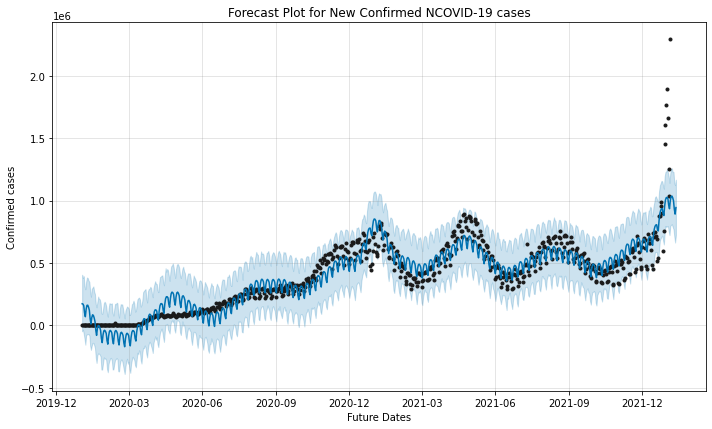

In [97]:
# Plot the Forecast for Worldwide NCOVID-19 New Confirmed cases
confirmed_forecast_plot = m.plot(forecast)
# Add plot title and other plot elements the normal way
plt.title('Forecast Plot for New Confirmed NCOVID-19 cases')
plt.xlabel('Future Dates')
plt.ylabel('Confirmed cases')

plt.show()

**Plot other plot elements**

Note: ds is the Future Dates



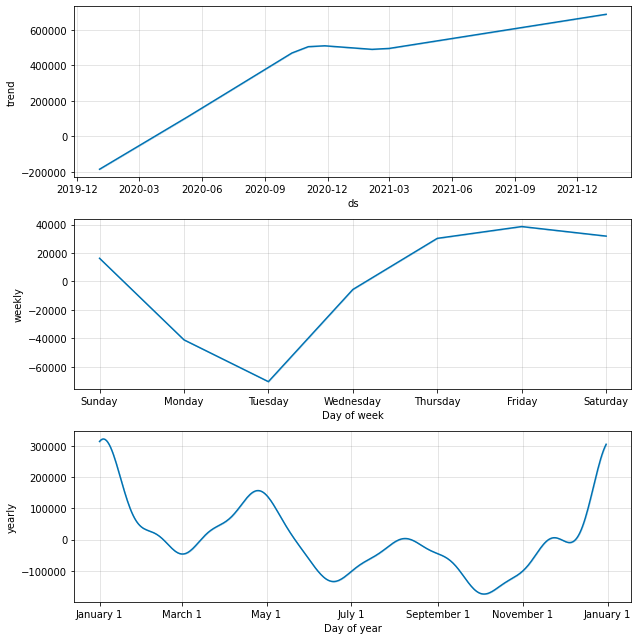

In [98]:
confirmed_forecast_plot = m.plot_components(forecast)
# Add plot title and other plot elements the normal way
print("Note: ds is the Future Dates\n")

## Forecasting Worldwide Deaths using Prophet (Base model)



The input to Prophet is always a dataframe with two columns: **ds** and **y**. The ds (**datestamp**) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.





In [99]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

print('Most rescent Death cases')
deaths.tail()

Most rescent Death cases


,ds,y
729,2022-01-01,6006
730,2022-01-02,4659
731,2022-01-03,3560
732,2022-01-04,4427
733,2022-01-05,7011


**Generating a week ahead forecast of deaths cases of NCOVID-19 using Prophet, with 95% prediction interval** by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [100]:
dm = Prophet(interval_width=0.95) #,changepoint_prior_scale=0.15, yearly_seasonality=True, daily_seasonality=True
dm.fit(deaths)
dfuture = dm.make_future_dataframe(periods=7, include_history=True)
# future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


The **predict** method will assign each row in future a predicted value which it names **yhat**. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column **yhat** with the forecast, as well as columns for components and uncertainty intervals.

In [102]:
dforecast = dm.predict(dfuture)
new_deaths = dforecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(8)
new_deaths
# Rename Columns
print('Forecasting Worldwide Death cases as at:', max(wDate), '\n')
new_deaths.columns=["Date_reported", "predicted_value", "lower_predicted_value", "upper_predicted_value"]
new_deaths

Forecasting Worldwide Death cases as at: 2022-01-05 00:00:00 



,Date_reported,predicted_value,lower_predicted_value,upper_predicted_value
733,2022-01-05,7107.517813,5232.898973,8982.671081
734,2022-01-06,7924.298366,5964.577495,9884.872155
735,2022-01-07,8015.306620,6112.305250,9987.643353
736,2022-01-08,8043.641830,6159.310851,10047.930009
737,2022-01-09,7419.256365,5585.534126,9373.613198
738,2022-01-10,6779.698722,4854.899302,8694.042675
739,2022-01-11,6645.962507,4741.169570,8680.275195
740,2022-01-12,7764.045155,5859.937152,9750.561024


**Plot the forecast** by calling the **Prophet.plot** method and passing in your forecast dataframe.[link text](https://)

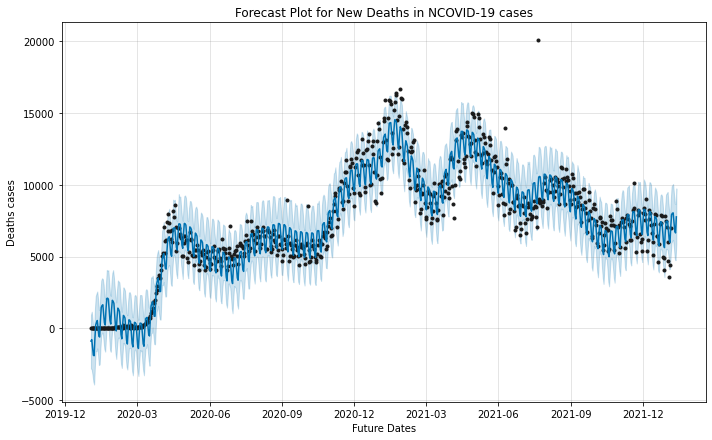

In [103]:
# Plot the Forecast for Worldwide NCOVID-19 New Death cases
deaths_forecast_plot = dm.plot(dforecast)
# Add plot title and other plot elements the normal way
plt.title('Forecast Plot for New Deaths in NCOVID-19 cases')
plt.xlabel('Future Dates')
plt.ylabel('Deaths cases')

plt.show()

**Plot other plot elements**

Note: ds is the Future Dates



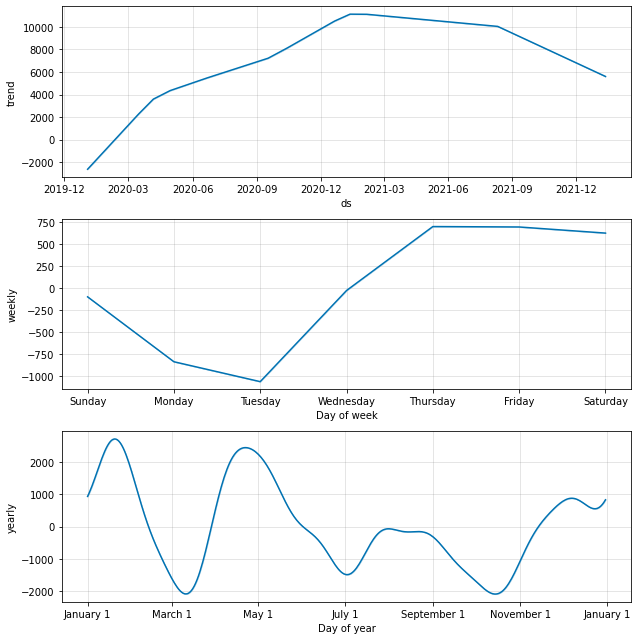

In [104]:
deaths_forecast_plot = dm.plot_components(dforecast)
# Add plot title and other plot elements the normal way
print("Note: ds is the Future Dates\n")

# Dash App

## Install Dash

In [105]:
!pip install dash
!pip install colour
!pip install jupyter_plotly_dash
!pip install jupyterlab
!pip install "jupyterlab>=1.0" jupyterlab-dash==0.1.0a3

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

     |████████████████████████████████| 7.3 MB 7.4 MB/s 
     |████████████████████████████████| 26.5 MB 61.3 MB/s 
     |████████████████████████████████| 357 kB 56.1 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=1c5bfa995a7f6130a079d1a6d0d6cc24c0e729b206940a18fec55cd75fa8d9f0
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4089 sha256=099baafe84b1e08d7bb415c9a2f2e33c4a281d4cd62d0f5c31fb047ec00d13c9
  Stored in directory: /root/.cache/pip/wheels/ec/6b/81/05aceabd8b27f724e2c96784016287cc1bfbc349ebfda451de
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3911 sha256=1ed5bc4e5b2b69795770a79e992737337b358436bdf2d622e17d45ced02616f3
  Stored in directory: /root/.cache/pip/wheels/85/5d/4e/7c276b57992951dbe770bf5caad6448d0539c510663ae

     |████████████████████████████████| 51 kB 4.7 MB/s 
     |████████████████████████████████| 1.1 MB 14.4 MB/s 
     |████████████████████████████████| 509 kB 50.5 MB/s 
     |████████████████████████████████| 160 kB 48.5 MB/s 
     |████████████████████████████████| 192 kB 59.7 MB/s 
     |████████████████████████████████| 271 kB 60.6 MB/s 
     |████████████████████████████████| 97 kB 6.5 MB/s 
     |████████████████████████████████| 7.9 MB 47.7 MB/s 
     |████████████████████████████████| 77 kB 7.4 MB/s 
     |████████████████████████████████| 1.0 MB 47.2 MB/s 
     |████████████████████████████████| 3.5 MB 51.0 MB/s 
     |████████████████████████████████| 82 kB 725 kB/s 
     |████████████████████████████████| 1.8 MB 43.1 MB/s 
  Created wheel for dash: filename=dash-1.20.0-py3-none-any.whl size=85841 sha256=6f497e2362c6a2d984f2373c72c907b218dfe1856999a21251281765e338db55
  Stored in directory: /root/.cache/pip/wheels/4f/c3/6a/a7cb9cedfdf93e0f0e8db0817ff2646d319afa9e4ca543ef9c


     |████████████████████████████████| 40 kB 4.9 MB/s 
--2022-01-06 15:10:34--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 54.237.133.81, 18.205.222.128, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  3.43MB/s    in 5.0s    

2022-01-06 15:10:41 (2.63 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


## Create Tunnel for Outside World

In [106]:
### Run ngrok to tunnel Dash app port 8050 to the outside world. 
### This command runs in the background.
get_ipython().system_raw('./ngrok http 8050 &')

### Get the public URL where you can access the Dash app. Copy this URL.
!curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
IndexError: list index out of range


## Run Dash to display Results

In [112]:
import datetime
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go

# Load and preprocess data
df = pd.read_excel('WHO-COVID-19-global-data_20220106.xlsx')

available_indicators = df['Date_reported'].unique()
#available_indicators = df['Indicator Name'].unique()

print(df.shape)
Date = str(datetime.datetime.now())

import jupyterlab_dash
# Build AppViewer 
from jupyterlab_dash import AppViewer
viewer = AppViewer()

# Build App
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                id='xaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value = Date
            ),
            dcc.RadioItems(
                id='xaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ],
        style={'width': '38%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                id='yaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value= Date
            ),
            dcc.RadioItems(
                id='yaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ],style={'width': '38%', 'float': 'right', 'display': 'inline-block'})
    ], style={
        'borderBottom': 'thin lightgrey solid',
        'backgroundColor': 'rgb(250, 250, 250)',
        'padding': '10px 5px'
    }),

    html.Div([
        dcc.Graph(
            id='indicator-graphic',
            hoverData={'points': [{'customdata': 'Japan'}]}
        )
    ], style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
    html.Div([
        dcc.Graph(id='x-time-series'),
        dcc.Graph(id='y-time-series'),
    ], style={'display': 'inline-block', 'width': '49%'}),
 
    #dcc.Graph(id='indicator-graphic'),

     html.Div(dcc.Slider(
        id='year--slider',
        min=df['Date_reported'].min(),
        max=df['Date_reported'].max(),
        value=df['Date_reported'].max(),
        marks={str(date): str(date) for date in df['Date_reported'].unique()},
        step=None
    ), style={'width': '49%', 'padding': '0px 20px 20px 20px'})
])

# Callbacks
@app.callback(
    dash.dependencies.Output('indicator-graphic', 'figure'),
    [dash.dependencies.Input('xaxis-column', 'value'),
     dash.dependencies.Input('yaxis-column', 'value'),
     dash.dependencies.Input('xaxis-type', 'value'),
     dash.dependencies.Input('yaxis-type', 'value'),
     dash.dependencies.Input('year--slider', 'value')])
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    dff = df[df['Date_reported'] == year_value]
    return {
        'data': [go.Scatter(
            x=dff[dff['Date_reported'] == xaxis_column_name]['Cumulative Confirmed'],
            y=dff[dff['Date_reported'] == yaxis_column_name]['Cumulative Deaths'],
            text=dff[dff['Date_reported'] == yaxis_column_name]['Country Name'],
            mode='markers',
            marker={
                'size': 10,
                'opacity': 1,
                'color': 'blue',
                'line': {'width': 2}
            }
        )],
        'layout': go.Layout(
            xaxis={
                'title': xaxis_column_name,
                'type': 'linear' if xaxis_type == 'Linear' else 'log'
            },
            yaxis={
                'title': yaxis_column_name,
                'type': 'linear' if yaxis_type == 'Linear' else 'log'
            },
            margin={'l': 30, 'b': 30, 't': 10, 'r': 0},
            hovermode='closest',
        )
    }
def create_time_series(dff, axis_type, title):
    return {
        'data': [go.Scatter(
            x=dff['Date_reported'],
            y=dff['Value'],
            mode='lines+markers'
        )],
        'layout': {
            'height': 225,
            'margin': {'l': 20, 'b': 30, 'r': 10, 't': 10},
            'annotations': [{
                'x': 0, 'y': 0.85, 'xanchor': 'left', 'yanchor': 'bottom',
                'xref': 'paper', 'yref': 'paper', 'showarrow': False,
                'align': 'left', 'bgcolor': 'rgba(255, 255, 255, 0.5)',
                'text': title
            }],
            'yaxis': {'type': 'linear' if axis_type == 'Linear' else 'log'},
            'xaxis': {'showgrid': False}
        }
    }

@app.callback(
    dash.dependencies.Output('x-time-series', 'figure'),
    [dash.dependencies.Input('indicator-graphic', 'hoverData'),
     dash.dependencies.Input('xaxis-column', 'value'),
     dash.dependencies.Input('xaxis-type', 'value')])
def update_y_timeseries(hoverData, xaxis_column_name, axis_type):
    country_name = hoverData['points'][0]['customdata']
    dff = df[df['Date_reported'] == country_name]
    dff = dff[dff['Date_reported'] == xaxis_column_name]
    title = '<b>{}</b><br>{}'.format(country_name, xaxis_column_name)
    return create_time_series(dff, axis_type, title)


@app.callback(
    dash.dependencies.Output('y-time-series', 'figure'),
    [dash.dependencies.Input('indicator-graphic', 'hoverData'),
     dash.dependencies.Input('yaxis-column', 'value'),
     dash.dependencies.Input('yaxis-type', 'value')])
def update_x_timeseries(hoverData, yaxis_column_name, axis_type):
    dff = df[df['Date_reported'] == hoverData['points'][0]['customdata']]
    dff = dff[dff['Date_reported'] == yaxis_column_name]
    return create_time_series(dff, axis_type, yaxis_column_name)

#viewer.show(app)
from IPython import display
def show_app(app,  # type: dash.Dash
             port=8051,
             width=1000,
             height=500,
             offline=True,
             style=True,
             **dash_flask_kwargs):
    """
    Run the application inside a Jupyter notebook and show an iframe with it
    :param app:
    :param port:
    :param width:
    :param height:
    :param offline:
    :return:
    """
    url = 'http://localhost:%d' % port
    iframe = '<iframe src="{url}" width={width} height={height}></iframe>'.format(url=url,
                                                                                  width=width,
                                                                                  height=height)
    display.display_html(iframe, raw=True)
    if offline:
        app.css.config.serve_locally = True
        app.scripts.config.serve_locally = True
    if style:
        external_css = ["https://fonts.googleapis.com/css?family=Raleway:400,300,600",
                        "https://maxcdn.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css",
                        "http://getbootstrap.com/dist/css/bootstrap.min.css", ]

        for css in external_css:
            app.css.append_css({"external_url": css})

        external_js = ["https://code.jquery.com/jquery-3.2.1.min.js",
                       "https://cdn.rawgit.com/plotly/dash-app-stylesheets/a3401de132a6d0b652ba11548736b1d1e80aa10d/dash-goldman-sachs-report-js.js",
                       "http://getbootstrap.com/dist/js/bootstrap.min.js"]

        for js in external_js:
            app.scripts.append_script({"external_url": js})

    return app.run_server(debug=False,  # needs to be false in Jupyter
                          port=port,
                          **dash_flask_kwargs)

show_app(app)
#print(port)

(173958, 8)


Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/

Dash is running on http://127.0.0.1:8051/



INFO:__main__:Dash is running on http://127.0.0.1:8051/



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:8051/ (Press CTRL+C to quit)


NameError: ignored

# COVID-19 Symptoms


## Coronavirus

The COVID-19 virus affects different people in different ways.  COVID-19 is a respiratory disease and most infected people will develop mild to moderate symptoms and recover without requiring special treatment.  People who have underlying medical conditions and those over 60 years old have a higher risk of developing severe disease and death.

Common symptoms include:

*  fever

*  tiredness

*  dry cough.

Other symptoms include:

*  shortness of breath

*  aches and pains

*  sore throat

*  and very few people will report diarrhoea, nausea or a runny nose.

People with mild symptoms who are otherwise healthy should self-isolate and contact their medical provider or a COVID-19 information line for advice on testing and referral.

People with fever, cough or difficulty breathing should call their doctor and seek medical attention.



**Source:**

WHO: https://www.who.int/health-topics/coronavirus#tab=tab_3


CDC: https://www.cdc.gov/coronavirus/2019-ncov/


![alt text](https://www.cdc.gov/coronavirus/2019-ncov/images/social/covid-19-symptoms-v03.png)

## Prevention

To prevent infection and to slow transmission of COVID-19, do the following:

1. Wash your hands regularly with soap and water, or clean them with alcohol-based hand rub.

2. Maintain at least 1 metre distance between you and people coughing or sneezing.
Avoid touching your face.

3. Cover your mouth and nose when coughing or sneezing.

4. Stay home if you feel unwell.

5. Refrain from smoking and other activities that weaken the lungs.

6. Practice physical distancing by avoiding unnecessary travel and staying away from large groups of people.

# Data Source:

**World Health Organization**

WHO

**Website:**

https://who.sprinklr.com/